In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import re
import math
import string
%matplotlib inline

In [2]:
df = pd.read_csv('Moore.csv', engine='python',error_bad_lines=False, header=None, sep='\t')


In [3]:
columns = ['Chip Name', 'Number', 'Year', 'Company', 'size per chip', 'total size']
df.columns = columns
df

,Chip Name,Number,Year,Company,size per chip,total size
0,Intel 4004,"2,300",1971,Intel,"10,000 nm",12 mm²
1,Intel 8008,"3,500",1972,Intel,"10,000 nm",14 mm²
2,Intel 8080,"4,500",1974,Intel,"6,000 nm",20 mm²
3,Motorola 6800,"4,100",1974,Motorola,"6,000 nm",16 mm²
4,RCA 1802,"5,000",1974,RCA,"5,000 nm",27 mm²
...,...,...,...,...,...,...
97,IBM z13,"3,990,000,000",2015,IBM,22 nm,678 mm²
98,IBM z13 Storage Controller,"7,100,000,000",2015,IBM,22 nm,678 mm²
99,Quad-core + GPU GT2 Core i7 Skylake K,"cca 1,750,000,000",2015,Intel,14 nm,122 mm²
100,SPARC M7,"10,000,000,000[37]",2015,Oracle,20 nm,NaN


In [4]:
pattern = '\[[0-9]*[a-z]*[A-Z]*\]'


In [5]:
# pattern = '\[\d\]'
# def clearning_username(text):
#     text = text.lower()
#     text = re.sub(pattern,'', str(text))
#     print(text)
#     return text.lower()
# print(clearning_username('Bibek[5]prs'))

In [6]:
def clean(x):
    text= re.sub(pattern,'', str(x))
    text = re.sub('[%s]' % string.punctuation, '', text)
    text = re.sub('[a-z]*[A-Z]*', '', text)
    return text.lower()


round1 = lambda x: clean(x)

In [7]:
ok = 'Bibek[4] I , ? am b[dfd]'
print(clean(ok))

In [8]:
df.Year = pd.DataFrame(df['Year'].apply(round1))
df.Number = pd.DataFrame(df['Number'].apply(round1))
df

,Chip Name,Number,Year,Company,size per chip,total size
0,Intel 4004,2300,1971,Intel,"10,000 nm",12 mm²
1,Intel 8008,3500,1972,Intel,"10,000 nm",14 mm²
2,Intel 8080,4500,1974,Intel,"6,000 nm",20 mm²
3,Motorola 6800,4100,1974,Motorola,"6,000 nm",16 mm²
4,RCA 1802,5000,1974,RCA,"5,000 nm",27 mm²
...,...,...,...,...,...,...
97,IBM z13,3990000000,2015,IBM,22 nm,678 mm²
98,IBM z13 Storage Controller,7100000000,2015,IBM,22 nm,678 mm²
99,Quad-core + GPU GT2 Core i7 Skylake K,1750000000,2015,Intel,14 nm,122 mm²
100,SPARC M7,10000000000,2015,Oracle,20 nm,NaN


In [9]:
xs = np.array(df.Year, dtype=np.float64)
ys = np.array(df.Number, dtype=np.float64)

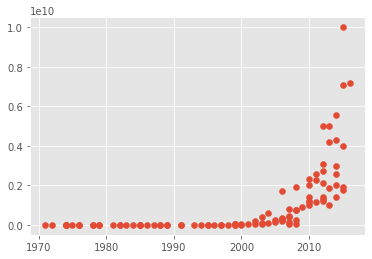

In [10]:
plt.scatter(xs, ys)


In [11]:
ys = np.log10(ys)

[]

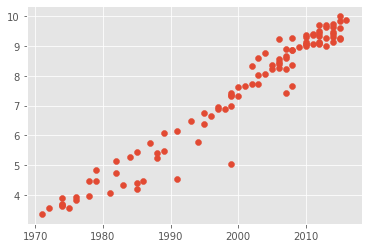

In [12]:
plt.scatter(xs, ys)
plt.plot()

In [13]:
import math
from statistics import mean
def best_fit_slope_and_m(xs,ys):
    m = (mean(xs) * mean(ys) - mean(xs * ys)) / (mean(xs)*mean(xs) - mean(xs*xs)) 
    b = mean(ys) - m*mean(xs)
    return (m, b)

m, b = best_fit_slope_and_m(xs, ys)
print(m, b)

0.15245628682005194 -297.4918436092128


In [14]:
regression_line = [(m*x)+b for x in xs]
regression_line

[2.9994977131095766,
 3.151953999929617,
 3.456866573569698,
 3.456866573569698,
 3.456866573569698,
 3.456866573569698,
 3.6093228603897387,
 3.761779147209836,
 3.761779147209836,
 4.066691720849917,
 4.066691720849917,
 4.219148007669958,
 4.219148007669958,
 4.524060581310096,
 4.676516868130136,
 4.676516868130136,
 4.828973154950177,
 4.981429441770217,
 5.133885728590258,
 5.133885728590258,
 5.133885728590258,
 5.286342015410355,
 5.438798302230396,
 5.591254589050436,
 5.591254589050436,
 5.743710875870477,
 5.743710875870477,
 6.048623449510615,
 6.048623449510615,
 6.353536023150696,
 6.505992309970736,
 6.658448596790777,
 6.658448596790777,
 6.810904883610874,
 6.963361170430915,
 6.963361170430915,
 7.115817457250955,
 7.268273744070996,
 7.268273744070996,
 7.268273744070996,
 7.268273744070996,
 7.268273744070996,
 7.420730030891036,
 7.420730030891036,
 7.573186317711134,
 7.725642604531174,
 7.725642604531174,
 7.878098891351215,
 7.878098891351215,
 7.878098891351215

In [15]:
style.use('fivethirtyeight')

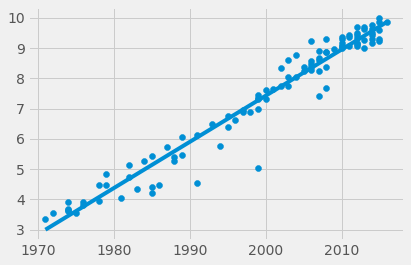

In [16]:
plt.scatter(xs, ys)
plt.plot(xs, regression_line)
plt.show()

In [17]:
def squared_error(ys_orig, ys_line):
    return (ys_line - ys_orig)**2

def coeff_of_determination(ys_orig, ys_line):
    y_mean_line = [mean(ys_orig) for y in ys_orig]
    squared_error_reg = squared_error(ys_orig, ys_line)
    squared_error_y_mean = squared_error(ys, y_mean_line)

    return (1 - squared_error_reg / squared_error_y_mean)

In [18]:
r_squ = coeff_of_determination(ys, regression_line)

In [19]:
r_squ

array([ 9.91832786e-01,  9.89495619e-01,  9.97209197e-01,  9.98277827e-01,
        9.95650423e-01,  9.83433079e-01,  9.99719844e-01,  9.99793340e-01,
        9.97625824e-01,  9.81477378e-01,  9.98916170e-01,  9.93000577e-01,
        9.41567630e-01,  9.80393835e-01,  9.99410475e-01,  9.59637737e-01,
        9.74172000e-01,  9.79784390e-01,  9.38679970e-01,  9.74967936e-01,
        9.13745348e-01,  9.21747141e-01,  9.65113001e-01,  9.74755902e-01,
        9.90389897e-01,  9.80162744e-01,  9.36038517e-01,  7.16521424e-01,
        9.95654833e-01,  9.75389089e-01,  7.86106473e-01,  9.83069930e-01,
        9.28164810e-01,  9.41949293e-01,  9.98030838e-01,  9.68159980e-01,
        7.63294811e-01, -1.09447381e+00, -6.27620620e+00,  8.55339297e-02,
       -5.24105435e+00,  4.51149180e-01,  3.60954308e-01, -3.26654700e+00,
        9.20206525e-01,  5.97772963e-01,  9.98421087e-01,  9.49768926e-01,
        8.45770945e-01,  6.50578933e-01,  7.20240918e-01,  9.99245214e-01,
        9.97264329e-01,  

# using sklearn linear regression

In [20]:
x = np.array(df.Year, dtype=np.float64)
y = np.array(df.Number, dtype=np.float64)
y = np.log10(y)

In [21]:
# x= x.reshape(1, -1)
# y= y.reshape(1, -1)
print(len(x))

102


In [22]:
from sklearn import preprocessing
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [23]:
x = preprocessing.scale(x)


In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.2)

In [25]:
clf = SVR(kernel='poly')
clf.fit(X_train.reshape(-1, 1), Y_train.reshape(-1,1))
Accuracy = clf.score(X_test.reshape(-1, 1), Y_test.reshape(-1, 1))
Accuracy

/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.6255804528417044

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=38a5f705-02d4-481a-a9f2-a7b671e2e93f' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>